"""
Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

"""

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [45]:
startups = pd.read_csv('C:/Users/Ashwini/Desktop/ExcelRAssignments/Multi Linear Regression/50_Startups.csv')
startups

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [46]:
startups1 = startups.rename({'R&D Spend':'RD' ,'Administration':'Admin' ,'Marketing Spend':'Marketing'} ,axis = 1)
startups1

,RD,Admin,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [47]:
data=startups1.Profit

In [48]:
startups1.corr()

,RD,Admin,Marketing,Profit
RD,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


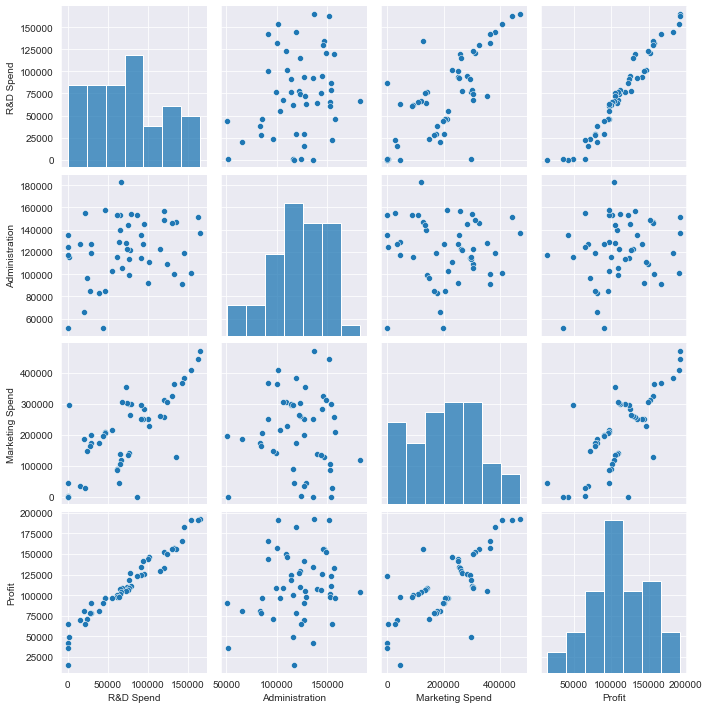

In [49]:
sns.set_style(style = 'darkgrid')
sns.pairplot(startups)

# Preparing a Model

In [50]:
model = smf.ols('Profit~RD+Admin+Marketing', data = startups1).fit()

In [51]:
model.params

Intercept    50122.192990
RD               0.805715
Admin           -0.026816
Marketing        0.027228
dtype: float64

In [52]:
print(model.tvalues, '/n', model.pvalues)

Intercept     7.626218
RD           17.846374
Admin        -0.525507
Marketing     1.655077
dtype: float64 /n Intercept    1.057379e-09
RD           2.634968e-22
Admin        6.017551e-01
Marketing    1.047168e-01
dtype: float64


In [53]:
model.rsquared, model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

##  Multi Linear Regression Model

In [54]:
ml_v=smf.ols('Profit~RD',data = startups1).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    19.320288
RD           29.151139
dtype: float64 
 Intercept    2.782697e-24
RD           3.500322e-32
dtype: float64


In [55]:
ml_v=smf.ols('Profit~Marketing',data = startups1).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    7.808356
Marketing    7.802657
dtype: float64 
 Intercept    4.294735e-10
Marketing    4.381073e-10
dtype: float64


In [56]:
ml_v=smf.ols('Profit~RD+Marketing',data = startups1).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    17.463582
RD           19.265555
Marketing     1.927052
dtype: float64 
 Intercept    3.504062e-22
RD           6.040433e-24
Marketing    6.003040e-02
dtype: float64


# Calculating VIF

In [57]:
rsq_RD = smf.ols('RD~Marketing+Admin', data = startups1).fit().rsquared
vif_RD = 1/(1-rsq_RD)

rsq_Marketing = smf.ols('Marketing~RD+Admin', data = startups1).fit().rsquared
vif_Marketing = 1/(1-rsq_Marketing)

rsq_Admin = smf.ols('Admin~Marketing+RD', data = startups1).fit().rsquared
vif_Admin = 1/(1-rsq_Admin)

d1 = {'Variables':['RD','Marketing','Admin'],'VIF':[vif_RD,vif_Marketing,vif_Admin]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RD,2.468903
1,Marketing,2.326773
2,Admin,1.175091


# Test of Normality For Residuals(Q-Q Plot)

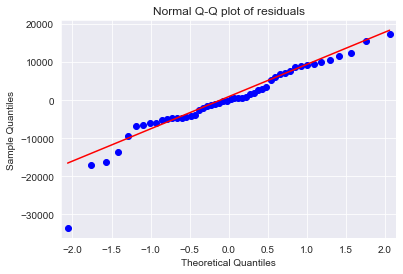

In [58]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [59]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

In [60]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

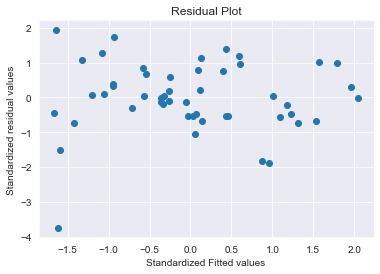

In [61]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Detecting Outliers

In [62]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

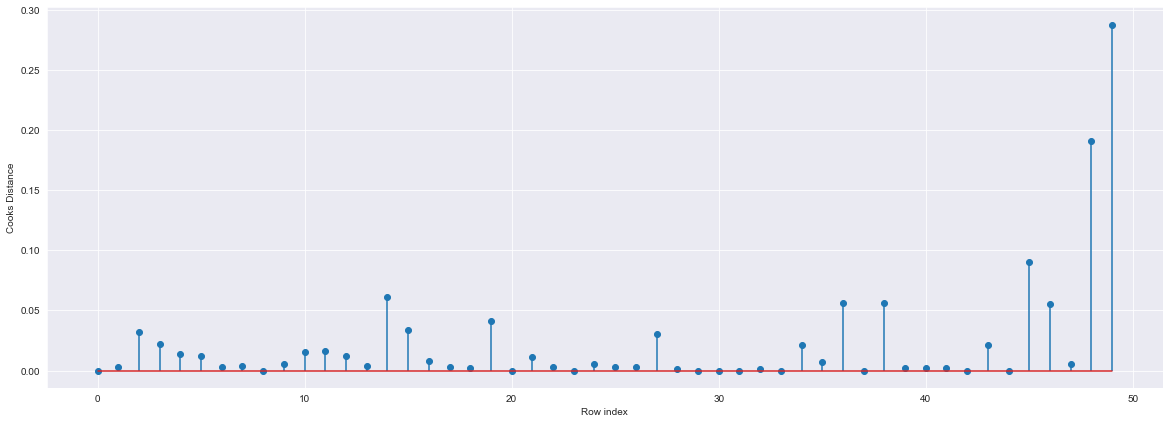

In [63]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startups1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [64]:
np.argmax(c), np.max(c)

(49, 0.28808229275432634)

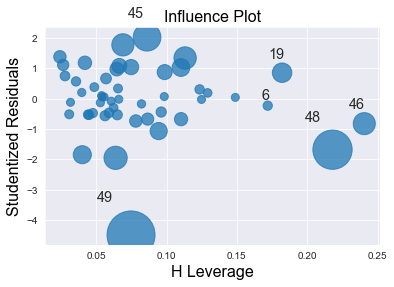

In [65]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [66]:
k = startups1.shape[1]
n = startups1.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [67]:
#From the above plot, it is evident that data point 46 and 48 are the outliers

# Improving the Model

In [68]:
startups1_new = startups1
startups1_new

,RD,Admin,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [69]:
startup1=startups1_new.drop(startups1_new.index[[46,48]],axis=0).reset_index()

In [70]:
startup1=startup1.drop(['index'],axis=1)

In [71]:
startup1

,RD,Admin,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [72]:
final_ml_V= smf.ols('Profit~RD+Marketing+Admin',data = startup1).fit()

In [73]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.9476328184406568, 1015.1029014742593)

In [74]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

Text(0, 0.5, 'Cooks Distance')

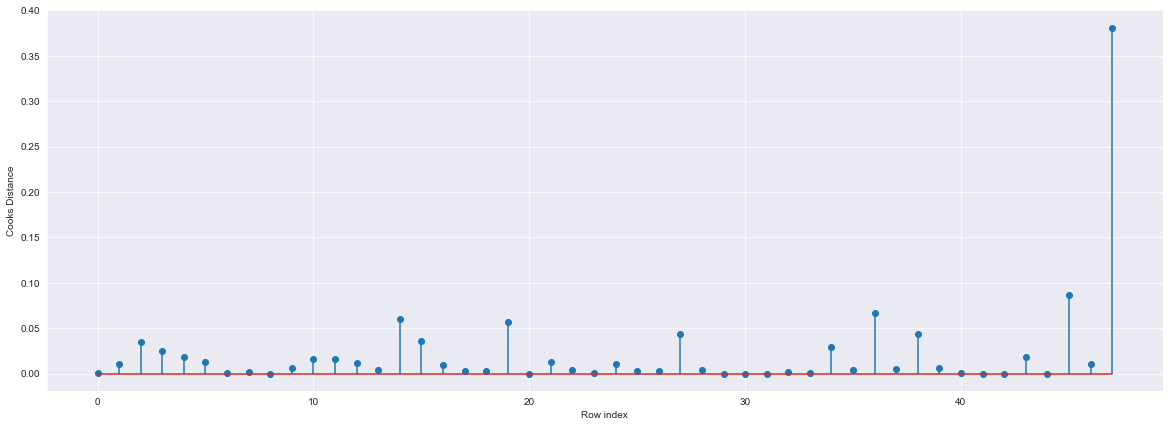

In [75]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [76]:
np.argmax(c_V), np.max(c_V)

(47, 0.38070658711540734)

In [77]:
startup2=startup1.drop(startup1.index[[45,47]],axis=0)

In [78]:
startup2

,RD,Admin,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [79]:
startup2=startup2.reset_index()

In [80]:
startup2.drop(['index'],axis=1, inplace = True)

In [81]:
startup2.shape

(46, 5)

In [82]:
final_ml_R= smf.ols('Profit~RD+Marketing+Admin',data = startup2).fit()

In [85]:
model_influence_R = final_ml_R.get_influence()
(c_V2, _) = model_influence_R.cooks_distance

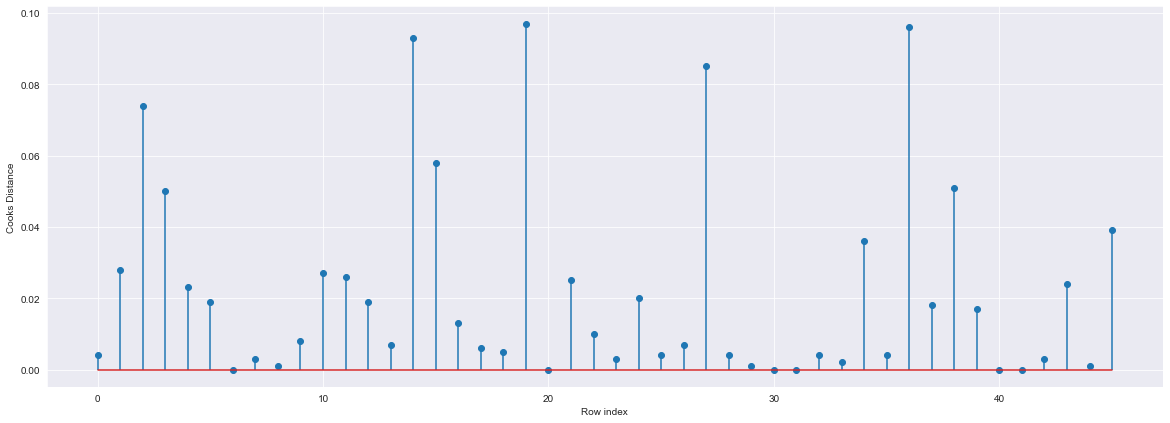

In [86]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup2)),np.round(c_V2,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [87]:
np.argmax(c_V), np.max(c_V)

(47, 0.38070658711540734)

In [88]:
final_ml_R= smf.ols('Profit~RD+Marketing+Admin',data = startup2).fit()

In [89]:
final_ml_R.rsquared , final_ml_V.aic

(0.962593650298269, 1015.1029014742593)

In [90]:
startup3=startup2.drop(startup2.index[[14,19,27,36]],axis=0)

In [91]:
startup3

,RD,Admin,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [95]:
final_ml_S= smf.ols('Profit~RD+Marketing+Admin',data = startup3).fit()

In [96]:
model_influence_S = final_ml_S.get_influence()
(c_V3, _) = model_influence_S.cooks_distance

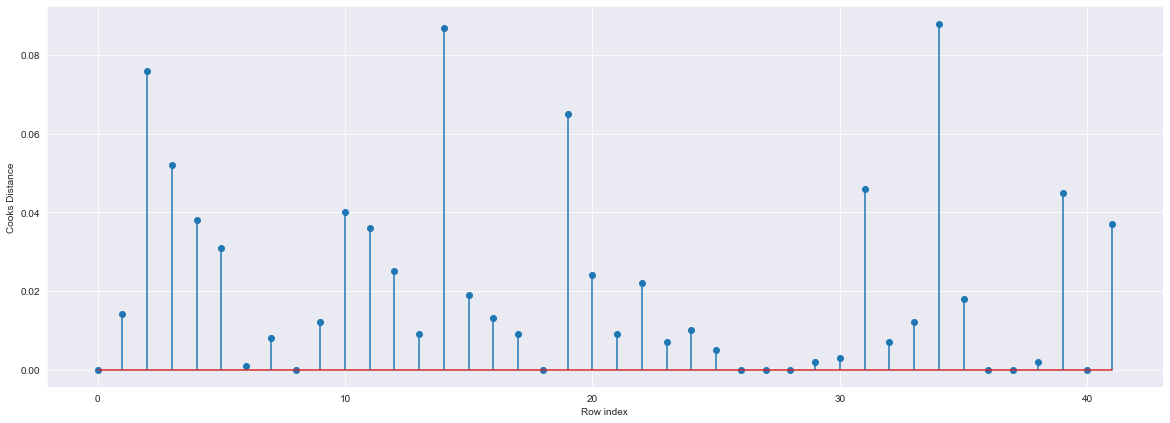

In [97]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup3)),np.round(c_V3,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [98]:
final_ml_S= smf.ols('Profit~RD+Marketing+Admin',data = startup3).fit()

In [99]:
final_ml_S.rsquared, final_ml_V.aic

(0.9727840588916423, 1015.1029014742593)

# Predicting fro New Data

In [100]:
new_data=pd.DataFrame({'RD':136897,"Admin":471784,"Marketing":192261.83},index=[1])

In [101]:
final_ml_V.predict(new_data)

1    143236.342287
dtype: float64

In [102]:
final_ml_V.predict(startup3.iloc[0:5,])

0    191273.578922
1    187572.357489
2    182069.020609
3    173272.506364
4    172498.485481
dtype: float64

In [103]:
pred_y = final_ml_V.predict(startup3)
pred_y

0     191273.578922
1     187572.357489
2     182069.020609
3     173272.506364
4     172498.485481
5     163837.127877
6     157248.418474
7     159087.280316
8     150849.085992
9     155052.173523
10    135947.174340
11    136520.490154
12    129201.307337
13    127349.273744
15    146166.752830
16    117313.270895
17    129735.834914
18    129422.130420
20    117239.844689
21    116808.368087
22    115088.189873
23    110917.494486
24    114483.705337
25    102415.602143
26    110528.474357
28    100666.749403
29    101621.239074
30    100351.964459
31     97593.033341
32     99552.905684
33     99130.637473
34     88882.700371
35     92338.855992
37     92395.088502
38     72372.162417
39     85728.208191
40     75968.807047
41     76892.425171
42     72463.563305
43     61355.745131
44     64980.278757
45     47677.885771
dtype: float64

#### Original Vs Predicted :

In [104]:
dm= pd.DataFrame({"ORIGINAL":data,"Pred":pred_y})
dm

,ORIGINAL,Pred
0,192261.83,191273.578922
1,191792.06,187572.357489
2,191050.39,182069.020609
3,182901.99,173272.506364
4,166187.94,172498.485481
5,156991.12,163837.127877
6,156122.51,157248.418474
7,155752.60,159087.280316
8,152211.77,150849.085992
9,149759.96,155052.173523


In [105]:
New = pd.DataFrame({"Original":model.rsquared,
                    "Model1":final_ml_V.rsquared,
                    "Model2":final_ml_R.rsquared, 
                    "Model3":final_ml_S.rsquared}, index = [1])
New

,Original,Model1,Model2,Model3
1,0.950746,0.947633,0.962594,0.972784
